# Artificial Neural Network

Artificial Neural Networks (ANNs) are at the core of Deep Learning. They mimic the human brain's structure to process complex data patterns.

It consists of interconnected neurons (or nodes) that process and transform data.

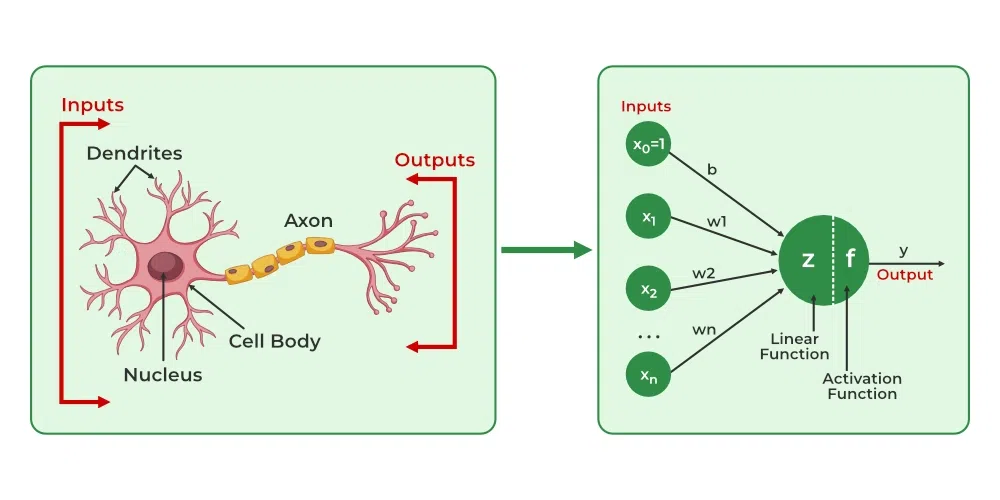

| Biological Neuron        | Artificial Neuron       |
|--------------------------|-------------------------|
| **Dendrite**              | **Inputs**              |
| Receives signals from other neurons | Receives inputs from other nodes or data sources |
| **Cell Nucleus / Soma**   | **Nodes**               |
| Processes signals and integrates them | Performs computations and transformations based on inputs |
| **Synapses**              | **Weights**             |
| Junctions where signals pass from one neuron to another | Parameters that determine the strength of the connection between nodes |
| **Axon**                  | **Output**              |
| Transmits electrical impulses away from the cell body | The final result produced by the artificial neuron after processing |


___

## Neurons (Perceptron)

The fundamental unit of a neural network.

A perceptron is the simplest type of artificial neural network.

It takes in one or more inputs, processes them, and produces an output.

<table>
  <tr>
    <th><font size="4">Component</font></th>
    <th><font size="4">Description</font></th>
  </tr>
  <tr>
    <td><font size="3">Input</font></td>
    <td><font size="3">The data fed into the neuron.</td>
  </tr>
  <tr>
    <td><font size="3">Weight</font></td>
    <td><font size="3">Each input has an associated weight, which determines the importance of the input.</td>
  </tr>
  <tr>
    <td><font size="3">Bias</font></td>
    <td><font size="3">An additional parameter that allows the model to make adjustments to the output, even when all inputs are zero. It helps shift the activation function.</td>
  </tr>
  <tr>
    <td><font size="3">Activation Function</font></td>
    <td><font size="3">A mathematical function that decides whether a neuron should be activated or not. It introduces non-linearity, enabling the model to learn complex patterns.</td>
  </tr>
  <tr>
    <td><font size="3">Output</font></td>
    <td><font size="3">The final layer that produces the network’s prediction.</td>
  </tr>
</table>


**Mathematical Representation:**

    y = f(WX + b)

Where:
* X = Input features
* W = Weights
* b = Bias
* f = Activation function
* y = Output

## Understanding the Perceptron

A perceptron is the simplest type of artificial neural network. It follows these steps:
* Initialize weights and bias

* Multiply inputs by weights and add bias:
    
      z=W⋅X+b

* Apply an activation function (step function) to determine the output:

        y=1 if z≥0, 0 otherwise

* Training: Update weights using the perceptron learning rule.

* Prediction: After training, use the learned weights and bias to make predictions.

## Perceptron Learning Rule

If the prediction is incorrect, update the weights and bias.

For an input with label y and predicted output y_pred, the **update rule**:

Weight update:

    w = w + η.(y−y_pred).x
Bias update:

    b = b + η.(y−y_pred)
Here,
η is the learning rate, and
x is the input vector.

## Perceptron Implementation in Python

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=1000):
        # Initialize weights and bias
        self.weights = np.zeros(input_dim)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Step function as activation
    def activation(self, x):
        return 1 if x >= 0 else 0

    # Training the perceptron
    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                # Compute the weighted sum of inputs
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation(linear_output)

                # Update the weights and bias if prediction is wrong
                if prediction != y[i]:
                    # Update weights and bias
                    self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                    self.bias += self.learning_rate * (y[i] - prediction)

    # Making predictions
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            linear_output = np.dot(X[i], self.weights) + self.bias
            predictions.append(self.activation(linear_output))
        return np.array(predictions)

# Example: OR Gate
# Inputs: X = [x1, x2]
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Target output for OR gate
y = np.array([0, 1, 1, 1])

# Initialize and train the perceptron
perceptron = Perceptron(input_dim=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test the model
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [0 1 1 1]


In [ ]:
# Example: AND Gate
# Inputs: X = [x1, x2]
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Target output for AND gate
y = np.array([0, 0, 0, 1])

# Initialize and train the perceptron
perceptron = Perceptron(input_dim=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test the model
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 0 1]


In [ ]:
# Example: XOR Gate
# Inputs: X = [x1, x2]
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Target output for XOR gate
y = np.array([0, 1, 1, 0])

# Initialize and train the perceptron
perceptron = Perceptron(input_dim=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test the model
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [1 1 0 0]


## Why Perceptron Cannot Model XOR

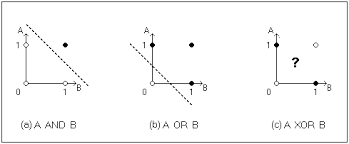

A single-layer perceptron, with only one layer of neurons, cannot handle XOR because the data points are **not linearly separable**.

This means the Perceptron needs to be extended into a multi-layer network (i.e., a multi-layer perceptron or MLP) to handle XOR.
___

Before diving into MLP, try to clear
* Activation functions
* Forward Propagation
* Loss Function / Loss Calculation
* Backpropagation
* Optimization / optimizer

## Activation Functions

An activation function is a mathematical function used in a neural network to determine the output of a node (or neuron) given a set of inputs and weights.

* It plays a crucial role in enabling the neural network to model complex, non-linear relationships.

* Without activation functions, the network would only be able to model linear relationships, which would severely limit its capabilities.

| Type                     | Activation Function                 | Formula                                                                                     |
|--------------------------|-------------------------------------|---------------------------------------------------------------------------------------------|
| **Linear**                | Linear Activation                   | `f(x) = x`                                                                                 |
| **Sigmoid**               | Sigmoid                             | `f(x) = 1 / (1 + e^(-x))`                                                                   |
| **Tanh**                  | Hyperbolic Tangent (Tanh)           | `f(x) = (e^x - e^(-x)) / (e^x + e^(-x))`                                                     |
| **ReLU**                  | Rectified Linear Unit (ReLU)        | `f(x) = max(0, x)`                                                                          |
| **Leaky ReLU**            | Leaky ReLU                          | `f(x) = x if x > 0 else α * x`, where `α` is a small constant, e.g., 0.01                    |
| **ELU**                   | Exponential Linear Unit (ELU)       | `f(x) = x if x > 0 else α * (e^x - 1)`, where `α` is a positive constant                     |
| **SELU**                  | Scaled Exponential Linear Unit (SELU)| `f(x) = λ * (x if x > 0 else α * (e^x - 1))`, where `λ` and `α` are constants               |
| **Softmax**               | Softmax                             | `f(x_i) = e^(x_i) / Σ e^(x_j)` for each element `i` of the input vector, outputs a probability distribution |
| **Swish**                 | Swish                               | `f(x) = x / (1 + e^(-x))`                                                                   |
| **GELU**                  | Gaussian Error Linear Unit (GELU)   | `f(x) = 0.5 * x * (1 + tanh(sqrt(2/π) * (x + 0.044715 * x^3)))`                             |
| **Hard Sigmoid**          | Hard Sigmoid                        | `f(x) = max(0, min(1, 0.2 * x + 0.5))`                                                      |
| **Hard Swish**            | Hard Swish                          | `f(x) = x * ReLU6(x + 3) / 6` where `ReLU6(x) = min(max(0, x), 6)`                           |
| **Mish**                  | Mish                                | `f(x) = x * tanh(softplus(x))`, where `softplus(x) = log(1 + e^x)`                            |
| **Step Function** | Step Function (Heaviside)        | `f(x) = 1 if x >= 0 else 0`                                                                  |


### Choosing the Right Activation Function

| Activation Function   | Range          | Use Case                                        | Default Choice for Layer         | Task                                  |
|-----------------------|----------------|-------------------------------------------------|----------------------------------|---------------------------------------|
| **Step**              | 0 to 1         | Perceptrons, simple tasks                      | Input/Output Layer               | Simple binary classification tasks   |
| **Sigmoid**           | 0 to 1         | Binary classification (output layer)            | Output Layer                     | Binary classification (logistic regression) |
| **Tanh**              | -1 to 1        | Hidden layers (better than sigmoid)             | Hidden Layers                    | Recurrent networks, simple neural networks |
| **ReLU**              | 0 to ∞         | Deep networks (hidden layers)                   | Hidden Layers                    | Deep learning networks, CNNs         |
| **Leaky ReLU**        | -∞ to ∞        | Improves ReLU for negative values               | Hidden Layers                    | Deep networks (to avoid dying ReLU)  |
| **Softmax**           | 0 to 1         | Multi-class classification (output layer)       | Output Layer                     | Multi-class classification (e.g., in CNNs) |
| **ELU**               | -∞ to ∞        | Deep networks, reduces bias shift               | Hidden Layers                    | Deep networks, faster convergence   |
| **SELU**              | -∞ to ∞        | Self-normalizing networks                       | Hidden Layers                    | Deep networks, self-normalizing models |
| **Swish**             | -∞ to ∞        | Networks with large gradients                    | Hidden Layers                    | Improving ReLU-like networks, deep models |
| **GELU**              | -∞ to ∞        | Gaussian error linear units                     | Hidden Layers                    | Transformers, complex deep learning models |
| **Hard Sigmoid**      | 0 to 1         | Efficient approximation of sigmoid               | Output Layer                     | Binary classification in resource-limited environments |
| **Hard Swish**        | 0 to 1         | Efficient ReLU-like activation                   | Hidden Layers                    | Efficient deep learning networks in mobile/edge devices |
| **Mish**              | -∞ to ∞        | Non-monotonic smooth activation function        | Hidden Layers                    | Complex deep learning models, improving ReLU |


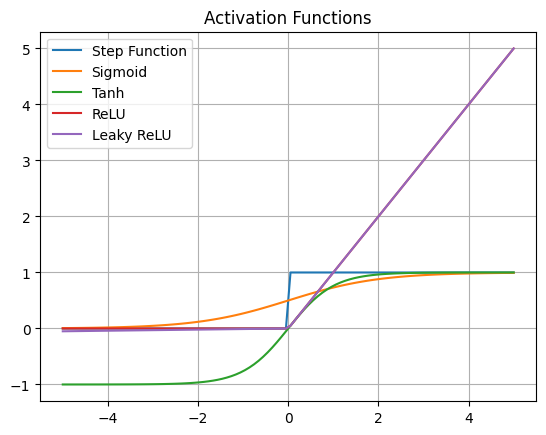

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

x = np.linspace(-5, 5, 100)

plt.plot(x, step_function(x), label="Step Function")
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, tanh(x), label="Tanh")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, leaky_relu(x), label="Leaky ReLU")
plt.legend()
plt.title("Activation Functions")
plt.grid()
plt.show()


## Forward Propagation

The process of passing input data through the network, layer by layer, to get an output prediction.

🔹 Steps:

1. Multiply inputs by weights.
2. Add bias.
3. Pass through an activation function.
4. Repeat for each layer until reaching the output.

### Forward Progagation Implementation

Let's implement forward propagation for a simple neural network with one hidden layer using NumPy.

Neural Network Structure
* Input Layer: 2 neurons
* Hidden Layer: 3 neurons (ReLU activation)
* Output Layer: 1 neuron (Sigmoid activation)

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for output layer

def relu(x):
    return np.maximum(0, x)  # ReLU for hidden layer

# Forward Propagation Function
def forward_propagation(X, W1, b1, W2, b2):
    # Hidden layer
    Z1 = np.dot(W1, X) + b1  # Weighted sum
    A1 = relu(Z1)  # Activation function

    # Output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # Final output

    return A2  # Prediction

# Initialize sample weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(3, 2)  # Weights for hidden layer (3 neurons, 2 inputs)
b1 = np.random.randn(3, 1)  # Bias for hidden layer
W2 = np.random.randn(1, 3)  # Weights for output layer (1 neuron, 3 hidden neurons)
b2 = np.random.randn(1, 1)  # Bias for output layer

# Input data (2 features, 1 sample)
X = np.array([[0.5], [0.2]])

# Perform forward propagation
output = forward_propagation(X, W1, b1, W2, b2)
print("Final Output:", output)

Final Output: [[0.63914325]]


## Loss Function

The loss function measures how far the predicted output of a neural network is from the actual target values.

The goal of training is to **minimize this loss** by adjusting the model’s weights.

| Type                     | Loss Function                       | Formula                                                                                     |
|--------------------------|-------------------------------------|---------------------------------------------------------------------------------------------|
| **Regression**            | Mean Squared Error (MSE)            | `L = (1/n) * Σ (y - ŷ)^2`                                                                    |
|            | Mean Absolute Error (MAE)           | `L = (1/n) * Σ (y - ŷ)`                                                                      |
|           | Huber Loss                          | `L = (1/n) * Σ { 0.5 * (y - ŷ)^2  if (y - ŷ) <= δ, δ * ((y - ŷ) - 0.5 * δ) otherwise }`   |
|      Regression (Smooth and robust)     | Log-Cosh Loss                          | `∑log(cosh(y−y_pred))`   |
| **Binary Classification** | Binary Cross-Entropy (BCE)         | `L = -(1/n) * Σ [y * log(ŷ) + (1 - y) * log(1 - ŷ)]`                                          |
| **SVM Classification**| Hinge Loss                          | `L = (1/n) * Σ max(0, 1 - y * ŷ)`                                                            |
| **Multi-Class Classification** | Categorical Cross-Entropy (CCE) | `L = - Σ yᵢ * log(ŷᵢ)`                                                                      |
|  | Sparse Categorical Cross-Entropy (Sparse CCE) | `L = - Σ yᵢ * log(ŷᵢ)`                                                                  |
|  | Kullback-Leibler Divergence (KL Divergence) | `L = Σ yᵢ * log(yᵢ / ŷᵢ)`                                                               |
|  | Negative Log-Likelihood (NLL)    | `L = - Σ yᵢ * log(ŷᵢ)`                                                                      |
|  | Softmax Cross-Entropy           | `L = - Σ yᵢ * log(softmax(ŷᵢ))`                                                             |
| **Generative Models**     | Kullback-Leibler Divergence (KL Divergence) | `L = Σ p(x) * log(p(x) / q(x))`                                                           |
|     | Wasserstein Loss                    | `L = Σ (y - ŷ)`                                                                              |
| **Unsupervised Learning** | Contrastive Loss                    | `L = (1/n) * Σ (1 - y) * max(0, m - (ŷ₁ - ŷ₂))^2 + y * (ŷ₁ - ŷ₂)^2`                         |


Custom Loss → Can be created using a combination of functions.
___

## Backpropagation

Backpropagation is an algorithm used to train neural networks by minimizing the error (loss) through gradient descent.

`for more details: read optimization techniques in Deep Leaning`

### Steps of Backpropagation

* **Forward Propagation:** Compute predictions using the current weights.
* **Compute Loss:** Measure how far the prediction is from the actual value.
* **Compute Gradients** (Backward Propagation):
  * Calculate derivatives of the loss function with respect to weights and biases.
  * Use the chain rule to propagate gradients backward through the layers.
* **Update Weights:** Adjust weights using gradient descent.

In [ ]:
import numpy as np

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)

# Initialize weights and biases
np.random.seed(0)
input_dim = 2
hidden_dim = 2
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# Training
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Backward pass
    error = y - a2
    d2 = error * sigmoid_deriv(a2)
    d1 = np.dot(d2, W2.T) * sigmoid_deriv(a1)

    # Update weights and biases
    W2 += np.dot(a1.T, d2) * lr
    b2 += np.sum(d2, axis=0, keepdims=True) * lr
    W1 += np.dot(X.T, d1) * lr
    b1 += np.sum(d1, axis=0, keepdims=True) * lr

# Output after training
print("Predictions after training:")
print(a2.round())

Predictions after training:
[[0.]
 [0.]
 [1.]
 [1.]]


### Backpropagation Implementation

Let's implement a single-layer neural network with one hidden layer, trained using backpropagation.

**Neural Network Structure**
* Input Layer: 2 neurons
* Hidden Layer: 3 neurons (ReLU activation)
* Output Layer: 1 neuron (Sigmoid activation)

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for output layer

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

def relu(x):
    return np.maximum(0, x)  # ReLU for hidden layer

def relu_derivative(x):
    return (x > 0).astype(float)

# Forward and Backward Propagation
def train(X, y, epochs=1000, learning_rate=0.1):
    np.random.seed(42)  # For reproducibility

    # Initialize weights and biases
    W1 = np.random.randn(3, 2) * 0.01  # Weights for hidden layer (3 neurons, 2 inputs)
    b1 = np.random.randn(3, 1)   # Bias for hidden layer
    W2 = np.random.randn(1, 3) * 0.01  # Weights for output layer (1 neuron, 3 hidden neurons)
    b2 = np.random.randn(1, 1)   # Bias for output layer

    # Training loop
    for epoch in range(epochs):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute loss (Binary Crossentropy)
        loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

        # Backpropagation
        dA2 = A2 - y  # Derivative of loss w.r.t A2
        dZ2 = dA2 * relu_derivative(A2)  # Derivative of Z2
        dW2 = np.dot(dZ2, A1.T) / X.shape[1]
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)  # Derivative of Z1
        dW1 = np.dot(dZ1, X.T) / X.shape[1]
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2  # Return trained weights and biases

# Example dataset ( XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # 2 features, 4 samples
y = np.array([[0, 1, 1, 0]])  # Expected output

# Train the network
W1, b1, W2, b2 = train(X, y)

# Test the trained model
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

print("Final Predictions:", A2.round())


Epoch 0, Loss: 0.7007
Epoch 100, Loss: 0.6931
Epoch 200, Loss: 0.6931
Epoch 300, Loss: 0.6931
Epoch 400, Loss: 0.6931
Epoch 500, Loss: 0.6931
Epoch 600, Loss: 0.6931
Epoch 700, Loss: 0.6931
Epoch 800, Loss: 0.6931
Epoch 900, Loss: 0.6931
Final Predictions: [[1. 1. 0. 0.]]


What gone wrong?

* Note
  - wrong implementation of gradients / derivatives
  - here, Derivative of Z2 should be, dZ2 = dA2 * sigmoid_derivative(A2)
  - and, Derivative of Z1 should be dZ1 = dA1 * tanh_derivative(Z1)


    Implementation of Gradients should be taken care.

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for output layer

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

def relu(x):
    return np.maximum(0, x)  # ReLU for hidden layer

def relu_derivative(x):
    return (x > 0).astype(float)

# Forward and Backward Propagation
def train(X, y, epochs=1000, learning_rate=0.1):
    np.random.seed(42)  # For reproducibility

    # Initialize weights and biases
    W1 = np.random.randn(3, 2) * np.sqrt(1 / 2)  # Weights for hidden layer (3 neurons, 2 inputs)
    b1 = np.random.randn(3, 1)   # Bias for hidden layer
    W2 = np.random.randn(1, 3)  * np.sqrt(1 / 4)  # Weights for output layer (1 neuron, 3 hidden neurons)
    b2 = np.random.randn(1, 1)   # Bias for output layer

    # Training loop
    for epoch in range(epochs):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute loss (Binary Crossentropy)
        loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

        # Backpropagation
        dA2 = A2 - y  # Derivative of loss w.r.t A2
        dZ2 = dA2 * sigmoid_derivative(A2)  # Derivative of Z2
        dW2 = np.dot(dZ2, A1.T) / X.shape[1]
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)  # Derivative of Z1
        dW1 = np.dot(dZ1, X.T) / X.shape[1]
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Predictions: ", A2.round())

    return W1, b1, W2, b2  # Return trained weights and biases

# Example dataset ( XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # 2 features, 4 samples
y = np.array([[0, 1, 1, 0]])  # Expected output

# Train the network
W1, b1, W2, b2 = train(X, y)

# Test the trained model
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

print("Final Predictions:", A2.round())

Epoch 0, Loss: 0.7106, Predictions:  [[1. 1. 1. 1.]]
Epoch 100, Loss: 0.6964, Predictions:  [[1. 0. 1. 0.]]
Epoch 200, Loss: 0.6957, Predictions:  [[1. 0. 1. 0.]]
Epoch 300, Loss: 0.6951, Predictions:  [[1. 0. 1. 0.]]
Epoch 400, Loss: 0.6947, Predictions:  [[1. 0. 1. 0.]]
Epoch 500, Loss: 0.6943, Predictions:  [[1. 0. 1. 0.]]
Epoch 600, Loss: 0.6941, Predictions:  [[1. 0. 1. 0.]]
Epoch 700, Loss: 0.6939, Predictions:  [[1. 0. 1. 0.]]
Epoch 800, Loss: 0.6937, Predictions:  [[1. 0. 1. 0.]]
Epoch 900, Loss: 0.6936, Predictions:  [[1. 0. 1. 0.]]
Final Predictions: [[1. 0. 1. 0.]]


In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for output layer

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

def relu(x):
    return np.maximum(0, x)  # ReLU for hidden layer

def relu_derivative(x):
    return (x > 0).astype(float)

# Forward and Backward Propagation
def train(X, y, epochs=5000, learning_rate=0.1):
    np.random.seed(42)  # For reproducibility

    # Initialize weights and biases
    W1 = np.random.randn(4, 2) * np.sqrt(1 / 2)  # Weights for hidden layer (3 neurons, 2 inputs)
    b1 = np.random.randn(4, 1)   # Bias for hidden layer
    W2 = np.random.randn(1, 4)  * np.sqrt(1 / 4)  # Weights for output layer (1 neuron, 3 hidden neurons)
    b2 = np.random.randn(1, 1)   # Bias for output layer

    # Training loop
    for epoch in range(epochs):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute loss (Binary Crossentropy)
        loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

        # Backpropagation
        dA2 = A2 - y  # Derivative of loss w.r.t A2
        dZ2 = dA2 * sigmoid_derivative(A2)  # Derivative of Z2
        dW2 = np.dot(dZ2, A1.T) / X.shape[1]
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)  # Derivative of Z1
        dW1 = np.dot(dZ1, X.T) / X.shape[1]
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Predictions: ", A2.round())

    return W1, b1, W2, b2  # Return trained weights and biases

# Example dataset ( XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # 2 features, 4 samples
y = np.array([[0, 1, 1, 0]])  # Expected output

# Train the network
W1, b1, W2, b2 = train(X, y)

# Test the trained model
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

print("Final Predictions:", A2.round())

### Why Prediction is Wrong?
* Network Architecture Issue - A single-layer perceptron (or even one hidden layer with linear activations) cannot learn XOR.
* Ensure the hidden layer has non-linearity (ReLU, Sigmoid, or Tanh).
* Bad Weight Initialization - Randomly initialized weights can lead to slow or incorrect convergence.
* Gradient Vanishing or Stagnation - The loss stops improving after 100 epochs (0.6936 stagnates).
* Learning Rate - A low learning rate might prevent proper updates. A high learning rate might cause unstable updates.

**Experiment with:**
* Add More Neurons in the Hidden Layer
* Increase Epochs or Learning Rate
* Weight Initializations (Xavier Initialization)
* Different activation functions

**Final Thoughts:**

Our network is partially learning XOR but struggles due to architecture and weight updates.


In [1]:
import numpy as np

class Activations:
    def __init__(self, activation='relu'):
        # Set the activation function based on the input
        self.activation_name = activation.lower()

    def activation(self, x):
        if self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))

        elif self.activation_name == 'relu':
            return np.maximum(0, x)

        elif self.activation_name == 'tanh':
            return np.tanh(x)

        elif self.activation_name == 'leaky_relu':
            alpha = 0.01
            return np.where(x > 0, x, alpha * x)

        elif self.activation_name == 'identity':
            return x
        else:
            raise ValueError(f"Activation function '{self.activation_name}' not recognized.")

    def activation_derivative(self, x):
        if self.activation_name == 'sigmoid':
            return x * (1 - x)  # Derivative of sigmoid

        elif self.activation_name == 'relu':
            return (x > 0).astype(float)  # Derivative of ReLU

        elif self.activation_name == 'tanh':
            return 1 - np.tanh(x)**2  # Derivative of tanh

        elif self.activation_name == 'leaky_relu':
            alpha = 0.01
            return np.where(x > 0, 1, alpha)  # Derivative of Leaky ReLU

        elif self.activation_name == 'identity':
            return np.ones_like(x)  # Derivative of identity function is 1
        else:
            raise ValueError(f"Derivative for activation function '{self.activation_name}' not recognized.")


In [4]:
import numpy as np

class SimpleNN:
    def __init__(self, hidden_layers=3, activation='relu', initialize_parameters=None, learning_rate=0.1):
        # Initialize parameters
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.act = Activations(activation)
        self.sigmoid = Activations('sigmoid')
        self.W1, self.b1, self.W2, self.b2 = initialize_parameters(self.hidden_layers)


        # For plotting
        self.losses = []  # To store loss values for plotting

    # Forward and Backward Propagation
    def train(self, X, y, epochs=1000):
        np.random.seed(42)  # For reproducibility

        # Training loop
        for epoch in range(epochs):
            # Forward Propagation
            Z1 = np.dot(self.W1, X) + self.b1
            A1 = self.act.activation(Z1)

            Z2 = np.dot(self.W2, A1) + self.b2
            A2 = self.sigmoid.activation(Z2)

            # Compute loss (Binary Crossentropy)
            loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

            # Backpropagation
            dA2 = A2 - y  # Derivative of loss w.r.t A2
            dZ2 = dA2 * self.sigmoid.activation_derivative(A2)  # Derivative of Z2
            dW2 = np.dot(dZ2, A1.T) / X.shape[1]
            db2 = np.mean(dZ2, axis=1, keepdims=True)

            dA1 = np.dot(self.W2.T, dZ2)
            dZ1 = dA1 * self.act.activation_derivative(Z1)  # Derivative of Z1
            dW1 = np.dot(dZ1, X.T) / X.shape[1]
            db1 = np.mean(dZ1, axis=1, keepdims=True)

            # Update weights and biases
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2

            # Store loss, weight norms, and bias norms for plotting
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Predictions: ", A2.round())

    # Predict function for new data
    def predict(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.act.activation(Z1)

        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.sigmoid.activation(Z2)
        return A2.round()


    def plot_loss_training(self):
        # plot loss vs epochs
        plt.figure(figsize=(10, 6))
        plt.plot(self.losses, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss vs Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()

# Example dataset ( XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # 2 features, 4 samples
y = np.array([[0, 1, 1, 0]])  # Expected output

In [5]:
# Initialize parameters
def initialize_parameters(hidden_layers):
    np.random.seed(42)    # Initialize weights and biases
    W1 = np.random.randn(hidden_layers, 2) * np.sqrt(1 / 2)  # Weights for hidden layer (3 neurons, 2 inputs)
    b1 = np.random.randn(hidden_layers, 1)   # Bias for hidden layer
    W2 = np.random.randn(1, hidden_layers)  * np.sqrt(1 / hidden_layers)  # Weights for output layer (1 neuron, 3 hidden neurons)
    b2 = np.random.randn(1, 1) # Bias for output layer
    return W1, b1, W2, b2

# Initialize parameters with Xavier initialization
def Xavier_initialize_parameters(hidden_layers):
    np.random.seed(42)
    W1 = np.random.randn(hidden_layers, 2) * np.sqrt(1 / 2)  # (Hidden Layer: 3 neurons, 2 inputs)
    b1 = np.zeros((hidden_layers, 1))  # Bias for hidden layer
    W2 = np.random.randn(1, hidden_layers) * np.sqrt(1 / hidden_layers)  # (Output Layer: 1 neuron, 3 hidden neurons)
    b2 = np.zeros((1, 1))  # Bias for output layer
    return W1, b1, W2, b2


# Initialize networks with different parameter initialization methods
nn1 = SimpleNN(hidden_layers=3, activation='relu', initialize_parameters=initialize_parameters)
nn2 = SimpleNN(hidden_layers=3, activation='relu', initialize_parameters=Xavier_initialize_parameters)

# Train the network 1
print('Training NN with random parameters...')
nn1.train(X, y, epochs=2000)
predictions = nn1.predict(X)
print(f"Predictions: {predictions}")
# nn1.plot_loss_training()

# Train the network 2
print('Training NN with Xavier initialization parameters...')
nn2.train(X, y, epochs=2000)
predictions = nn2.predict(X)
print(f"Predictions: {predictions}")
# nn2.plot_loss_training()

Training NN with random parameters...
Epoch 0, Loss: 0.7128, Predictions:  [[1. 1. 1. 1.]]
Epoch 100, Loss: 0.6973, Predictions:  [[1. 0. 1. 0.]]
Epoch 200, Loss: 0.6963, Predictions:  [[1. 0. 1. 0.]]
Epoch 300, Loss: 0.6956, Predictions:  [[1. 0. 1. 0.]]
Epoch 400, Loss: 0.6950, Predictions:  [[1. 0. 1. 0.]]
Epoch 500, Loss: 0.6946, Predictions:  [[1. 0. 1. 0.]]
Epoch 600, Loss: 0.6943, Predictions:  [[1. 0. 1. 0.]]
Epoch 700, Loss: 0.6941, Predictions:  [[1. 0. 1. 0.]]
Epoch 800, Loss: 0.6939, Predictions:  [[1. 0. 1. 0.]]
Epoch 900, Loss: 0.6937, Predictions:  [[1. 0. 1. 0.]]
Epoch 1000, Loss: 0.6936, Predictions:  [[1. 0. 1. 0.]]
Epoch 1100, Loss: 0.6935, Predictions:  [[1. 0. 1. 0.]]
Epoch 1200, Loss: 0.6934, Predictions:  [[1. 0. 1. 0.]]
Epoch 1300, Loss: 0.6934, Predictions:  [[1. 0. 1. 0.]]
Epoch 1400, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1500, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1600, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1700, Loss: 0.69

In [8]:
# Initialize networks with different hidden layers
nn1 = SimpleNN(hidden_layers=3, activation='relu', initialize_parameters=initialize_parameters)
nn2 = SimpleNN(hidden_layers=4, activation='relu', initialize_parameters=initialize_parameters)

# Train the network 1
print('Training NN with random parameters...')
nn1.train(X, y, epochs=2000)
predictions = nn1.predict(X)
print(f"Predictions: {predictions}")
# nn1.plot_loss_training()

# Train the network 2
print('Training NN with Xavier initialization parameters...')
nn2.train(X, y, epochs=2000)
predictions = nn2.predict(X)
print(f"Predictions: {predictions}")
# nn2.plot_loss_training()

Training NN with random parameters...
Epoch 0, Loss: 0.7128, Predictions:  [[1. 1. 1. 1.]]
Epoch 100, Loss: 0.6973, Predictions:  [[1. 0. 1. 0.]]
Epoch 200, Loss: 0.6963, Predictions:  [[1. 0. 1. 0.]]
Epoch 300, Loss: 0.6956, Predictions:  [[1. 0. 1. 0.]]
Epoch 400, Loss: 0.6950, Predictions:  [[1. 0. 1. 0.]]
Epoch 500, Loss: 0.6946, Predictions:  [[1. 0. 1. 0.]]
Epoch 600, Loss: 0.6943, Predictions:  [[1. 0. 1. 0.]]
Epoch 700, Loss: 0.6941, Predictions:  [[1. 0. 1. 0.]]
Epoch 800, Loss: 0.6939, Predictions:  [[1. 0. 1. 0.]]
Epoch 900, Loss: 0.6937, Predictions:  [[1. 0. 1. 0.]]
Epoch 1000, Loss: 0.6936, Predictions:  [[1. 0. 1. 0.]]
Epoch 1100, Loss: 0.6935, Predictions:  [[1. 0. 1. 0.]]
Epoch 1200, Loss: 0.6934, Predictions:  [[1. 0. 1. 0.]]
Epoch 1300, Loss: 0.6934, Predictions:  [[1. 0. 1. 0.]]
Epoch 1400, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1500, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1600, Loss: 0.6933, Predictions:  [[1. 0. 1. 0.]]
Epoch 1700, Loss: 0.69

In [7]:
# Initialize networks with different hidden layers
nn1 = SimpleNN(hidden_layers=3, activation='relu', initialize_parameters=Xavier_initialize_parameters)
nn2 = SimpleNN(hidden_layers=4, activation='relu', initialize_parameters=Xavier_initialize_parameters)

# Train the network 1
print('Training NN with random parameters...')
nn1.train(X, y, epochs=2000)
predictions = nn1.predict(X)
print(f"Predictions: {predictions}")
# nn1.plot_loss_training()

# Train the network 2
print('Training NN with Xavier initialization parameters...')
nn2.train(X, y, epochs=2000)
predictions = nn2.predict(X)
print(f"Predictions: {predictions}")
# nn2.plot_loss_training()

Training NN with random parameters...
Epoch 0, Loss: 0.7226, Predictions:  [[0. 1. 1. 1.]]
Epoch 100, Loss: 0.6592, Predictions:  [[0. 1. 1. 1.]]
Epoch 200, Loss: 0.6367, Predictions:  [[0. 1. 1. 1.]]
Epoch 300, Loss: 0.6152, Predictions:  [[0. 0. 1. 1.]]
Epoch 400, Loss: 0.5927, Predictions:  [[0. 0. 1. 0.]]
Epoch 500, Loss: 0.5726, Predictions:  [[0. 0. 1. 0.]]
Epoch 600, Loss: 0.5551, Predictions:  [[0. 0. 1. 0.]]
Epoch 700, Loss: 0.5402, Predictions:  [[0. 0. 1. 0.]]
Epoch 800, Loss: 0.5272, Predictions:  [[0. 0. 1. 0.]]
Epoch 900, Loss: 0.5160, Predictions:  [[0. 0. 1. 0.]]
Epoch 1000, Loss: 0.5046, Predictions:  [[0. 0. 1. 0.]]
Epoch 1100, Loss: 0.4932, Predictions:  [[0. 0. 1. 0.]]
Epoch 1200, Loss: 0.4798, Predictions:  [[0. 0. 1. 0.]]
Epoch 1300, Loss: 0.4605, Predictions:  [[0. 0. 1. 0.]]
Epoch 1400, Loss: 0.4354, Predictions:  [[0. 0. 1. 0.]]
Epoch 1500, Loss: 0.4003, Predictions:  [[0. 1. 1. 0.]]
Epoch 1600, Loss: 0.3559, Predictions:  [[0. 1. 1. 0.]]
Epoch 1700, Loss: 0.30

In [9]:
# Initialize networks with different activations
nn1 = SimpleNN(hidden_layers=4, activation='relu', initialize_parameters=Xavier_initialize_parameters)
nn2 = SimpleNN(hidden_layers=4, activation='tanh', initialize_parameters=Xavier_initialize_parameters)
nn3 = SimpleNN(hidden_layers=4, activation='leaky_relu', initialize_parameters=Xavier_initialize_parameters)
nn4 = SimpleNN(hidden_layers=4, activation='sigmoid', initialize_parameters=Xavier_initialize_parameters)
nn5 = SimpleNN(hidden_layers=4, activation='identity', initialize_parameters=Xavier_initialize_parameters)

# Train the network 1
print('\n\nTraining NN with activation = relu...')
nn1.train(X, y, epochs=2000)
predictions = nn1.predict(X)
print(f"Predictions: {predictions}")
# nn1.plot_loss_training()

# Train the network 2
print('\n\nTraining NN with activation = tanh...')
nn2.train(X, y, epochs=2000)
predictions = nn2.predict(X)
print(f"Predictions: {predictions}")
# nn2.plot_loss_training()

# Train the network 3
print('\n\nTraining NN with activation = leaky_relu...')
nn3.train(X, y, epochs=2000)
predictions = nn3.predict(X)
print(f"Predictions: {predictions}")
# nn3.plot_loss_training()

# Train the network 4
print('\n\nTraining NN with activation = sigmoid...')
nn4.train(X, y, epochs=2000)
predictions = nn4.predict(X)
print(f"Predictions: {predictions}")
# nn4.plot_loss_training()

# Train the network 5
print('\n\nTraining NN with activation = identity...')
nn5.train(X, y, epochs=2000)
predictions = nn5.predict(X)
print(f"Predictions: {predictions}")
# nn5.plot_loss_training()



Training NN with activation = relu...
Epoch 0, Loss: 0.6984, Predictions:  [[0. 1. 0. 0.]]
Epoch 100, Loss: 0.6939, Predictions:  [[1. 1. 0. 0.]]
Epoch 200, Loss: 0.6902, Predictions:  [[1. 1. 0. 0.]]
Epoch 300, Loss: 0.6863, Predictions:  [[1. 1. 0. 0.]]
Epoch 400, Loss: 0.6804, Predictions:  [[1. 1. 0. 0.]]
Epoch 500, Loss: 0.6708, Predictions:  [[1. 1. 0. 0.]]
Epoch 600, Loss: 0.6547, Predictions:  [[1. 1. 0. 0.]]
Epoch 700, Loss: 0.6352, Predictions:  [[1. 1. 0. 0.]]
Epoch 800, Loss: 0.6073, Predictions:  [[1. 1. 1. 0.]]
Epoch 900, Loss: 0.5725, Predictions:  [[1. 1. 1. 0.]]
Epoch 1000, Loss: 0.5427, Predictions:  [[1. 1. 1. 0.]]
Epoch 1100, Loss: 0.5128, Predictions:  [[0. 1. 1. 0.]]
Epoch 1200, Loss: 0.4825, Predictions:  [[0. 1. 1. 0.]]
Epoch 1300, Loss: 0.4525, Predictions:  [[0. 1. 1. 0.]]
Epoch 1400, Loss: 0.4230, Predictions:  [[0. 1. 1. 0.]]
Epoch 1500, Loss: 0.3941, Predictions:  [[0. 1. 1. 0.]]
Epoch 1600, Loss: 0.3665, Predictions:  [[0. 1. 1. 0.]]
Epoch 1700, Loss: 0.

<ipython-input-1-70631dafff77>:29: RuntimeWarning: overflow encountered in multiply
  return x * (1 - x)  # Derivative of sigmoid
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Epoch 1500, Loss: nan, Predictions:  [[nan nan nan nan]]
Epoch 1600, Loss: nan, Predictions:  [[nan nan nan nan]]
Epoch 1700, Loss: nan, Predictions:  [[nan nan nan nan]]
Epoch 1800, Loss: nan, Predictions:  [[nan nan nan nan]]
Epoch 1900, Loss: nan, Predictions:  [[nan nan nan nan]]
Predictions: [[nan nan nan nan]]


Training NN with activation = identity...
Epoch 0, Loss: 0.6958, Predictions:  [[0. 1. 0. 1.]]
Epoch 100, Loss: 0.6953, Predictions:  [[0. 1. 0. 1.]]
Epoch 200, Loss: 0.6949, Predictions:  [[0. 1. 0. 0.]]
Epoch 300, Loss: 0.6946, Predictions:  [[0. 1. 0. 0.]]
Epoch 400, Loss: 0.6944, Predictions:  [[0. 1. 0. 0.]]
Epoch 500, Loss: 0.6942, Predictions:  [[0. 1. 0. 0.]]
Epoch 600, Loss: 0.6940, Predictions:  [[0. 1. 0. 1.]]
Epoch 700, Loss: 0.6939, Predictions:  [[0. 1. 0. 1.]]
Epoch 800, Loss: 0.6938, Predictions:  [[0. 1. 0. 1.]]
Epoch 900, Loss: 0.6937, Predictions:  [[0. 1. 0. 1.]]
Epoch 1000, Loss: 0.6936, Predictions:  [[0. 1. 0. 1.]]
Epoch 1100, Loss: 0.6936, Predicti

## Multi-layer Neural Network (MLP)

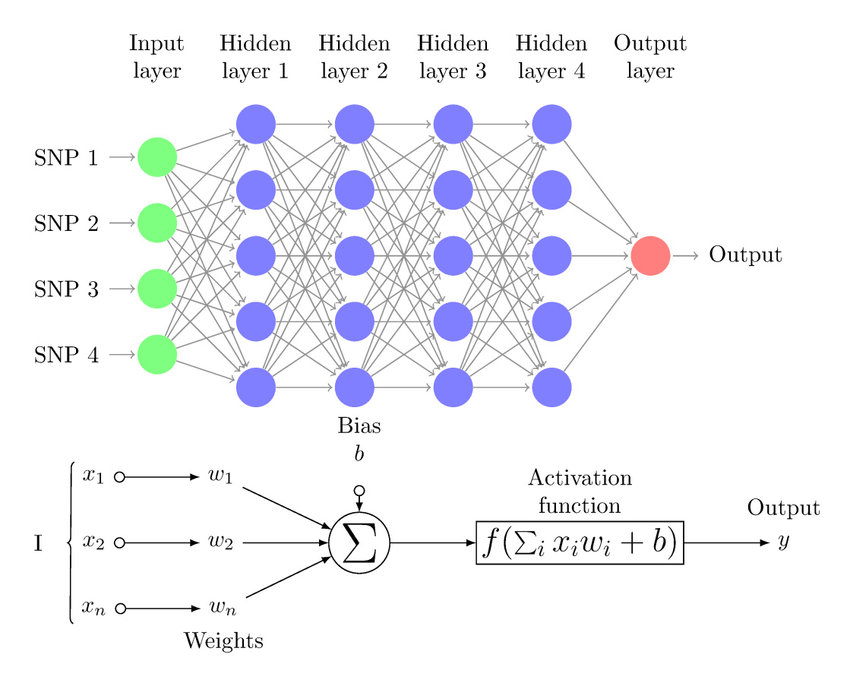

### Solving XOR Using a Multi-Layer Perceptron (MLP)

The XOR problem is not linearly separable, so a simple perceptron cannot learn it. Instead, we need a Multi-Layer Perceptron (MLP) with at least one hidden layer and a non-linear activation function (e.g., ReLU, Sigmoid, or Tanh).

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Initialize parameters with Xavier initialization
def initialize_parameters():
    np.random.seed(42)
    W1 = np.random.randn(4, 2) * np.sqrt(1 / 2)  # (Hidden Layer: 4 neurons, 2 inputs)
    b1 = np.zeros((4, 1))  # Bias for hidden layer
    W2 = np.random.randn(1, 4) * np.sqrt(1 / 4)  # (Output Layer: 1 neuron, 4 hidden neurons)
    b2 = np.zeros((1, 1))  # Bias for output layer
    return W1, b1, W2, b2

# Forward and Backward Propagation
def train(X, y, epochs=5000, learning_rate=0.1):
    W1, b1, W2, b2 = initialize_parameters()

    for epoch in range(epochs):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute loss (Binary Cross-Entropy)
        loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

        # Backpropagation
        dA2 = A2 - y  # Derivative of loss w.r.t A2
        dZ2 = dA2 * sigmoid_derivative(A2)  # Backprop through sigmoid
        dW2 = np.dot(dZ2, A1.T) / X.shape[1]
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)  # Backprop through ReLU
        dW1 = np.dot(dZ1, X.T) / X.shape[1]
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Predictions: ", A2.round())

    return W1, b1, W2, b2

# XOR dataset
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Inputs
y = np.array([[0, 1, 1, 0]])  # Expected output

# Train the network
W1, b1, W2, b2 = train(X, y)

# Test the trained model
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

print("\nFinal Predictions:", A2.round())  # Round to 0 or 1


Epoch 0, Loss: 0.6984, Predictions:  [[0. 1. 0. 0.]]
Epoch 1000, Loss: 0.5427, Predictions:  [[1. 1. 1. 0.]]
Epoch 2000, Loss: 0.2733, Predictions:  [[0. 1. 1. 0.]]
Epoch 3000, Loss: 0.1537, Predictions:  [[0. 1. 1. 0.]]
Epoch 4000, Loss: 0.1075, Predictions:  [[0. 1. 1. 0.]]

Final Predictions: [[0. 1. 1. 0.]]


### PyTorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer (4 neurons)
        self.output = nn.Linear(4, 1)  # Output layer (1 neuron)

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Apply ReLU activation
        x = torch.sigmoid(self.output(x))  # Apply Sigmoid activation
        return x

# Initialize Model
model = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Train model
for epoch in range(5000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f} Predictions:", outputs.detach().round().T.numpy())

# Predict
with torch.no_grad():
    predictions = model(X)
    print("\nFinal Predictions:", predictions.round().T.numpy())


Epoch 0, Loss: 0.6764 Predictions: [[1. 0. 1. 0.]]
Epoch 1000, Loss: 0.0000 Predictions: [[0. 1. 1. 0.]]
Epoch 2000, Loss: 0.0000 Predictions: [[0. 1. 1. 0.]]
Epoch 3000, Loss: 0.0000 Predictions: [[0. 1. 1. 0.]]
Epoch 4000, Loss: 0.0000 Predictions: [[0. 1. 1. 0.]]

Final Predictions: [[0. 1. 1. 0.]]


### TensorFlow Implementation

In [ ]:
import tensorflow as tf
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Build MLP Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),  # Hidden layer (4 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (1 neuron, binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=5000, verbose=0)

# Predict
predictions = model.predict(X)
print("\nFinal Predictions:", np.round(predictions).T)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Final Predictions: [[0. 1. 1. 0.]]


## Linear Regression vs Single Perceptron

| Feature               | Linear Regression                          | Single-Layer Perceptron                   |
|-----------------------|--------------------------------------------|-------------------------------------------|
| **Type of Model**      | Regression Model                           | Classification Model                     |
| **Mathematical Form**  | `y = wX + b`                               | `y = f(wX + b)`, where `f` is an activation function |
| **Learning Algorithm** | Ordinary Least Squares (OLS) or Gradient Descent | Perceptron Learning Rule or Gradient Descent |
| **Activation Function**| No activation (identity function)         | Uses Step, Sigmoid, ReLU, or Tanh        |
| **Output Type**        | Continuous (real-valued)                   | Discrete (binary or multi-class labels)  |
| **Used For**           | Predicting numerical values                | Classifying data into categories         |


If we use a linear activation or no activation function in a perceptron (i.e., f(x)=x), it becomes identical to Linear Regression in terms of computation. Both models reduce to: y = wX+b

# TensorFlow vs. PyTorch vs. Keras – Which One to Learn? 🤔

| Feature              | TensorFlow 🏋️‍♂️                                | PyTorch 🔥                               | Keras 🎨                                    |
|----------------------|-------------------------------------------------|-----------------------------------------|--------------------------------------------|
| **Ease of Use**       | Medium (low-level API)                         | Easier (Pythonic, flexible)            | Easiest (High-level, intuitive)            |
| **Performance**       | Optimized for large-scale training             | More flexible for research             | Uses TensorFlow backend                    |
| **Customization**     | Complex but powerful                           | Very flexible                          | Limited to predefined layers               |
| **Production Use**    | Best for production & mobile (TensorFlow Lite) | Great for research & prototyping        | Integrated with TensorFlow                 |
| **Debugging**         | Harder (static graphs)                         | Easy (dynamic graphs)                   | Easier (but less customizable)             |
| **Industry Adoption**| Google, Facebook, OpenAI                      | Researchers, DeepMind, FAIR             | Deep learning beginners                    |


✅ Learn TensorFlow if:

* You want to deploy models to production (Google Cloud, TensorFlow Lite, TensorFlow.js).
* You're working with large-scale deep learning models.
* You need graph-based optimizations (better performance).

✅ Learn PyTorch if:

* You want an easier learning curve and more flexibility.
* You're doing AI/ML research (e.g., NLP, vision, generative AI).
* You prefer dynamic computation graphs (better debugging & experimentation).

✅ Learn Keras if:

* You're a beginner in deep learning.
* You want to build models quickly without worrying about low-level details.
* You plan to use TensorFlow (since Keras is part of it now).

Best Approach? Start with Keras → Move to PyTorch → Learn TensorFlow for deployment.

Since you're a computer science student → Start with PyTorch (great for experimentation) → learn TensorFlow (Useful for deployment) → Use Keras for quick prototyping (since it’s part of TensorFlow).